출처 : FinanceData.KR

    FinanceDataReader Tutorial
https://github.com/FinanceData/FinanceDataReader/tree/master/tutorial

# VIX지수와 관련 종목

 - VIX 지수
 -- VIX지수(Volatility Index)는 S&P 500지수 옵션 가격에 대한 향후 30일 동안의 투자 기대치를 지수화 한 것입니다. 시카고 옵션거래소(CBOE)에서 제공하고 있어 CBOE VIX라고 표기하기도 합니다.

    --주식시장의 변동성이 커지면 위험을 헤지하기 위해 옵션에 대한 수요가 증가하게 되어 옵션의 가격(프리미엄)이 높아집니다. 즉, VIX가 오르게 됩니다. VIX 지수가 높다는 것은 곧 시장 참여자들의 시장에 대한 불안감이 크다는 것을 의미합니다. 이 때문에 VIX를 '공포지수'라고도 부르기도 합니다.

    --VIX는 단기적으로 증권 시장의 지수(예를 들어, S&P 500 지수)와 반대로 움직이는 특징이 있습니다.

    --VIX가 30(%)이라고 하면 앞으로 한 달간 주가가 30%의 등락을 할 것이라고 예상하는 투자자들이 많다는 것을 의미합니다. 보통 VIX는 보통 30을 기준으로 30보다 높으면 변동성이 높다고 하고, 20 이하면 변동성이 낮다고 합니다.

In [1]:
#matplotlib 설정
import matplotlib.pyplot as plt

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (14, 8)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

## VIX 가격 데이터(1990~2020)

In [3]:
import FinanceDataReader as fdr

vix = fdr.DataReader('VIX', '1990-01-01','2020-03-09') #S&P 500 VIX
vix.iloc[-5:]

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-03-03,36.82,33.64,41.06,24.93,0.0,0.1017
2020-03-04,31.99,34.44,35.58,30.30,0.0,-0.1312
2020-03-05,39.62,33.61,42.84,33.54,0.0,0.2385
2020-03-06,41.94,41.46,54.39,40.84,0.0,0.0586
2020-03-09,54.46,41.94,62.12,41.94,0.0,0.2985


In [4]:
3월 9일 VIX지수가 전일 대비 22.9% 상승해서 54.46를 기록했습니다.
이 수치는 세계금융위기 이후 최고치 입니다.

SyntaxError: invalid syntax (<ipython-input-4-ebdbb68447b7>, line 1)

Text(2020-03-09, 54.46, '54.46')

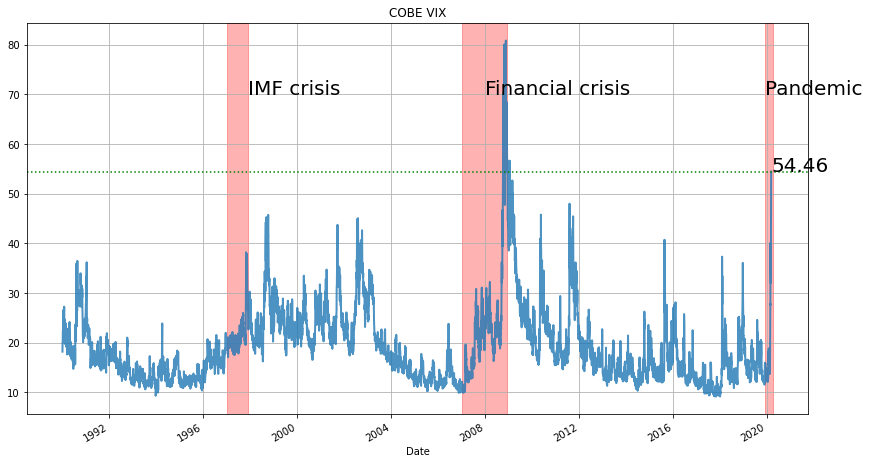

In [12]:
# @ vix index
ax = vix['Close'].plot(lw=2, alpha=0.8, title='COBE VIX')

# 외환위기

ax.axvspan('1997-01','1997-12', alpha = 0.3, color = 'red')
ax.annotate('IMF crisis', xy = ('1997-12-03', 70), fontsize = 20)

# 금융위기
ax.axvspan('2007-01','2008-12', alpha = 0.3, color = 'red')
ax.annotate('Financial crisis', xy = ('2008', 70), fontsize = 20)

#팬더믹
ax.axvspan('2019-12','2020-04', alpha = 0.3, color = 'red')
ax.annotate('Pandemic', xy = ('2019-12', 70), fontsize = 20)

# 2020-03-09 VIX 4.46
ax.axhline(54.46, ls=':', c='g')   # 51.55(2020-03-09 VIX)
ax.annotate('54.46', xy = ('2020-03-09', 54.46), fontsize = 20)


2020년 1월 ~ 3월까지의 vix지수를 보면 2월 중순이후 급격하겨 높아지는 것을 볼 수 있다.

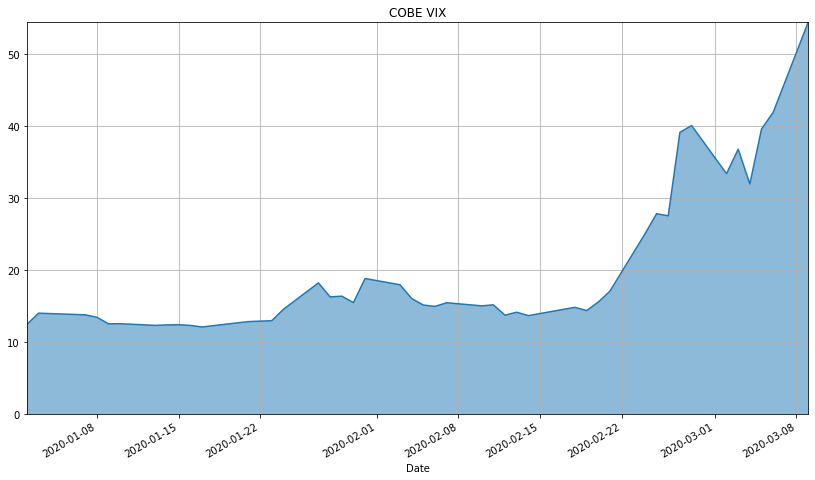

In [15]:
values = vix['2020-01-01':'2020-03-09']['Close']

ax = values.plot(figsize=(14,8), grid=True, title='COBE VIX')
ax.fill_between(values.index, 0, values, alpha=0.5)
ax.margins(0)

## VIX지수, S&P500지수, KOSPI지수 데이터

In [21]:
import FinanceDataReader as fdr

vix = fdr.DataReader('VIX', '2010-01-01','2020-03-09') #S&P500 VIX
kospi = fdr.DataReader('KS11', '2010-01-01','2020-03-09') #KOSPI index
sp500 = fdr.DataReader('US500', '2010-01-01','2020-03-09') #sp500 index

In [22]:
import pandas as pd

df = pd.concat([vix['Close'], kospi['Close'],sp500['Close']], axis = 1)
df.columns = ['VIX','KOSPI','S&P500']

## S&P500지수와 VIX지수
S&P500지수와 VIX지수는 서로 반대로 움직이는 것을 확일할 수 있습니다.

<AxesSubplot:xlabel='Date'>

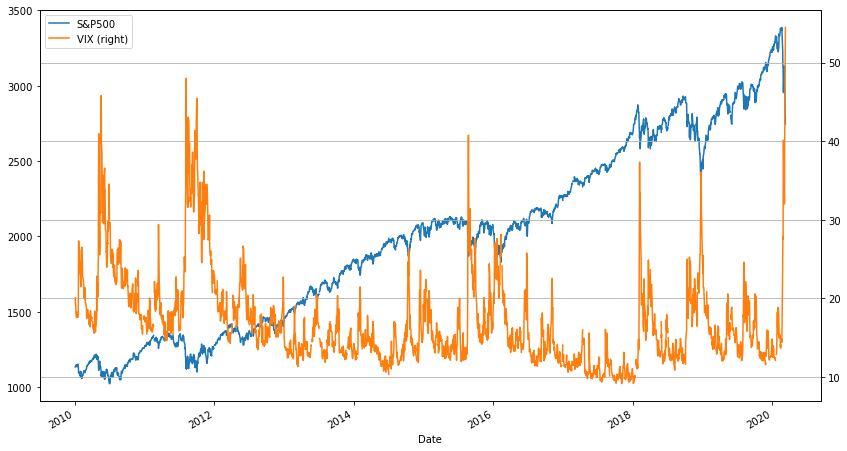

In [23]:
df[['S&P500','VIX']].plot(secondary_y='VIX')

## KOSPI지수와 VI지수

<AxesSubplot:xlabel='Date'>

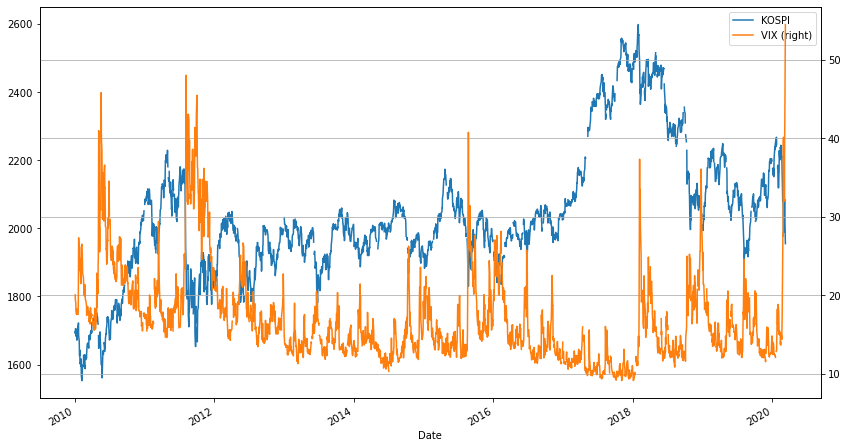

In [24]:
df[['KOSPI','VIX']].plot(secondary_y='VIX')

## VIX지수, S&P500지수, KOSPI지수 상관관계

In [25]:
df.corr()

,VIX,KOSPI,S&P500
VIX,1.000000,-0.514774,-0.439172
KOSPI,-0.514774,1.000000,0.704733
S&P500,-0.439172,0.704733,1.000000



KOSPI지수와 S&P500지수의 상관계수는 0.70으로 매우 높게 나타납니다.

VIX지수의 경우 S&P500지수와는 -0.439, KOSPI지수와는 -0.514로 역상관 관계가 나타납니다. VIX지수에 배팅한다는 것은 주식시장의 하락에 배팅을 한다는 의미가 됩니다.

## VIX 관련 종목

VIX관련한 투자 가능한 종목들의 심볼과 가격들을 살펴봅니다.

- 국내 VIX관련 ETN
    * 530065: 삼성 S&P500 VIX S/T 선물 ETN(H) B
    * 500045: 신한 S&P500 VIX S/T 선물 ETN B
    * 550058: QV S&P500 VIX S/T 선물 ETN B
- 해외선물
    * VX: S&P 500 VIX 선물 (해외선물)

- 미국 ETF
    * VXX: iPath Series B S&P 500 VIX Short-Term Futures ETN (NYSE)
    * VIXY: ProShares VIX Short-Term Futures ETF (NYSE)
    * VIXM: ProShares VIX Mid-Term Futures ETF (NYSE)
    * VIIX: VelocityShares Daily Long VIX Short-Term ETN (NASDAQ)
    * VXZ: iPath Series B S&P 500® VIX Mid-Term Futures ETN (NYSE)
    * XVZ: iPath S&P 500 Dynamic VIX ETN (NYSE)
    * EVIX: VelocityShares 1X Long VSTOXX Futures ETN (NYSE)

FinanceDataReader를 통해 위 종목들의 가격 데이터를 모두 조회가 가능합니다.

### S&P500 VIX 선물(해외선물)

<AxesSubplot:xlabel='Date'>

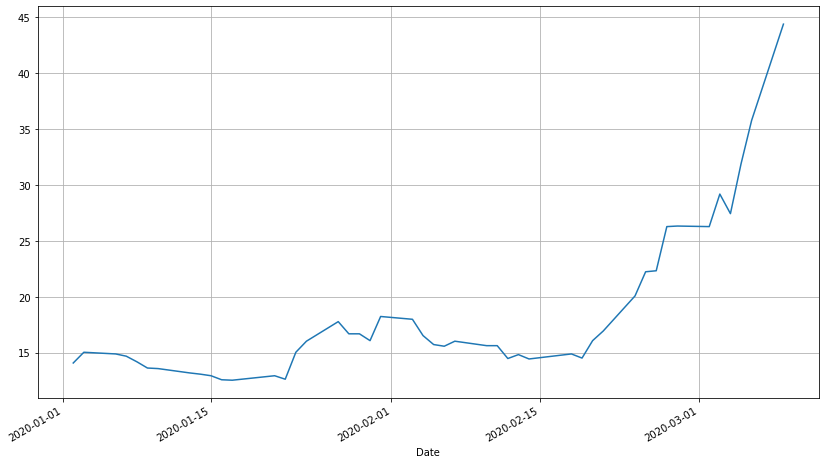

In [26]:
fdr.DataReader('VX', '2020-01-01','2020-03-09')['Close'].plot()

### S&P500 VIX S/T선물 ETN(H) B(530065)

국내 VIX와 연계된 ETN 종목 하나를 살펴봅니다.

삼성 S&P500 VIX S/T 선물 ETN(H) B (코스피)

https://finance.naver.com/item/main.nhn?code=530065

In [28]:
fdr.DataReader('530065','2020-01-01','2020-03-09').tail(5)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-03-03,16395,17365,16310,17190,26338,0.020784
2020-03-04,18585,19000,17600,17775,35725,0.034031
2020-03-05,17750,18260,17750,18135,14610,0.020253
2020-03-06,19775,21385,19350,20975,40049,0.156603
2020-03-09,27220,27265,26225,27265,69397,0.299881


<AxesSubplot:xlabel='Date'>

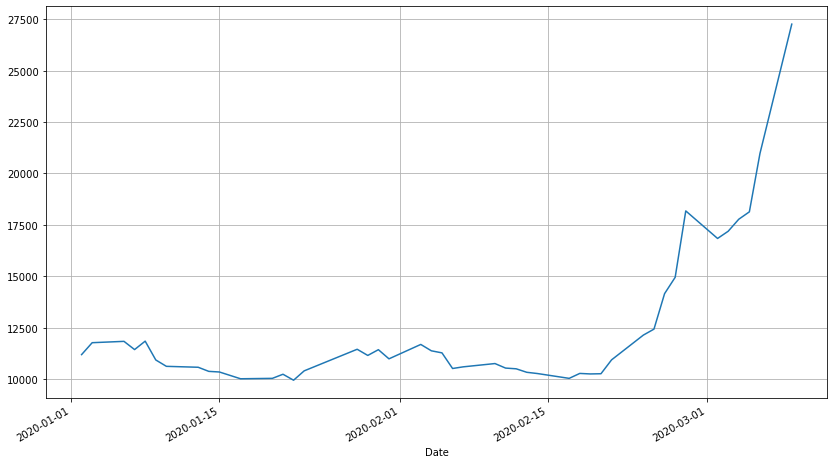

In [29]:
fdr.DataReader('530065','2020-01-01','2020-03-09')['Close'].plot()

In [30]:
price = fdr.DataReader('530065','2020-01-01','2020-03-09')['Close']

<AxesSubplot:xlabel='Date'>

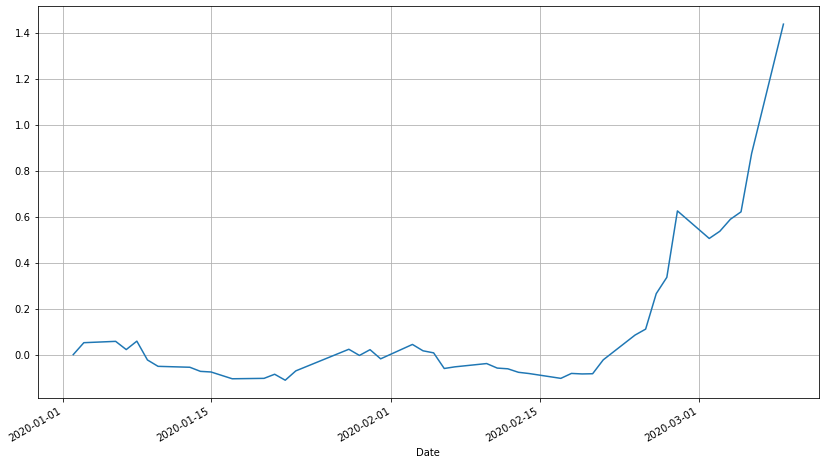

In [32]:
returns = price/ price[0]-1.0
returns.plot()

In [33]:
returns[-1]

1.436550491510277

530065 종목이 2020-03-09 상한가를 기록했습니다. 매우 이례적인 일입니다.

약 2개월 (2020-01-01 ~ 2020-03-09) 수익률이 143.6% 입니다.

# FRED 주요 경기 선행 지표

FinanceDataReader기능을 활용하여 FRED로 부터 대표적인 경기선행 지수 데이터를 가져와 향후 경기를 가늠해 봅니다.

In [35]:
# matplotlib 설정
import matplotlib.pyplot as plt

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

In [37]:
import FinanceDataReader as fdr

df = fdr.DataReader('NASDAQCOM',data_source='fred')
df

,NASDAQCOM
DATE,
1971-02-05,100.00
1971-02-08,100.84
1971-02-09,100.76
1971-02-10,100.69
1971-02-11,101.45
...,...
2021-02-10,13972.53
2021-02-11,14025.77
2021-02-12,14095.47


<AxesSubplot:xlabel='DATE'>

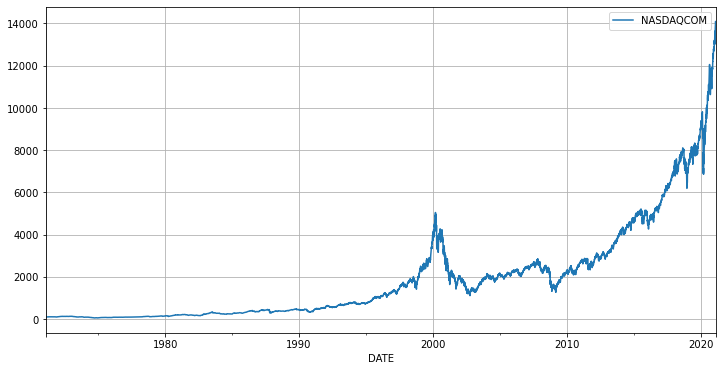

In [38]:
df.plot()

올해(2020년) 팬더믹이후 나스닥은 사상 최고 상승세를 이어가고 있습니다. 
9월 들어 조정을 받고 있습니다.

9월의 가격 흐름이 일시적인 조정인지 혹은 폭락의 시작인지 궁금합니다.

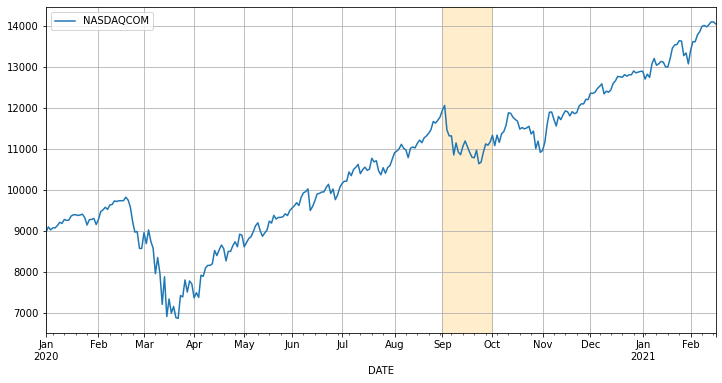

In [42]:
ax = df['2020':].plot()
ax = ax.axvspan('2020-09-01','2020-10-01', color='orange', alpha = 0.2)

선행지표란 경기가 좋아질 것인지 혹은 나빠질 것인지 앞서 반응하는 지표를 말합니다. 대표적인 선행지푣르이 무엇이 있는지 그리고 이 선행지표들을 살펴봄으로 향후 주식 시장의 흐름을 가늠해 볼 수 있습니다.

## 주간 실업수당 청구 건수(ICSA)
https://fred.stlouisfed.org/series/ICSA

요즘 미국 경기를 이야기 할 때 뉴스에 가장 많이 등장하는 지표중의 하나입니다. 주단위 신규 실업수당청구 건수 입니다.

참고로 연속 실업수당청구 건수 CCSA도 있습니다.

경기가 나빠지는 경우는 후행지표로 동작하지만, 경기가 좋아지는 경우 선행 지표로 활용할 수 있습니다. 2008년 금융위기 때는 약간 후행하는 모습을 보이고 있습니다

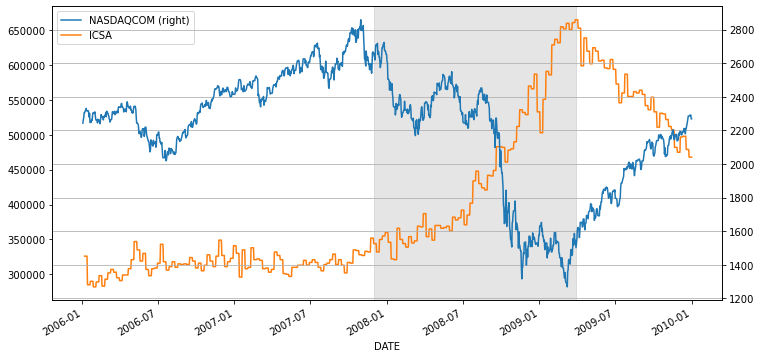

In [48]:
# 2008년 금융위기 나스닥지수(NASDAQCOM)와 주간 실업수당 청구 건수(ICSA)

df = fdr.DataReader(['NASDAQCOM', 'ICSA'], start = '2006', end = '2010',
               data_source = 'fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01', '2009-03-30', color='gray', alpha = 0.2)

최근 주간 실업수당 청구 건수는 꾸준히 감소하여 팬더믹 이후 최저를 기록하고 있습니다.

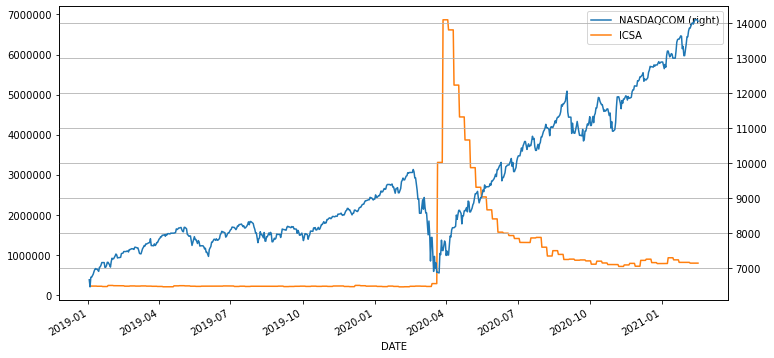

In [52]:
# 최근 (2020년 10월), 나스탁지수(NASDAQCOM)와 주간 실업수당 청구 건수(ICSA)

df = fdr.DataReader(['NASDAQCOM','ICSA'], start = '2019', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')

In [53]:
df.tail()

,NASDAQCOM,ICSA
DATE,,
2021-02-10,13972.53,793000.0
2021-02-11,14025.77,793000.0
2021-02-12,14095.47,793000.0
2021-02-15,14095.47,793000.0
2021-02-16,14047.50,793000.0


## 소비자심리지수(UMCSENT)
https://fred.stlouisfed.org/series/UMCSENT

UMCSENT (University of Michigan: Consumer Sentiment)는 미시건대 소비자심리지수 추이로 소비자심리지수(CSI, Consumer Sentiment Index)는 소비자에 설문 결과를 수치화한 지표 입니다.

100을 기준으로 100이상이면 긍정적 100이하면 부정적으로 봅니다. 100이상이면 즉, 긍정적이면 소매업 유리하겠죠.

2008년 금융위기 주가 하락이 본격화 되기 전에 소비자심리지수(CSI)가 먼저 하락하는 것을 또렸하게 볼 수 있습니다.

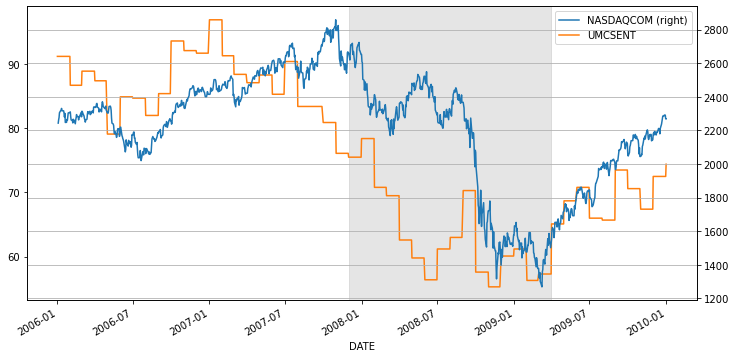

In [58]:
# 2008년 금융위기 나스닥지수(NASDAQCOM)와 미시건대 소비자심리지수(UNCSENT)

df = fdr.DataReader(['NASDAQCOM','UMCSENT'], start = '2006', end='2010', data_source = 'fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01', '2009-03-30', color ='gray', alpha=0.2)

현재(2020년 10월초) 소비자심리지수(CSI)는 72부근에서 회복되지 않고 있습니다.
소비자심리지수(CSI)는 경기에 대해 다소 부정적인 신호를 주고 있습니다.

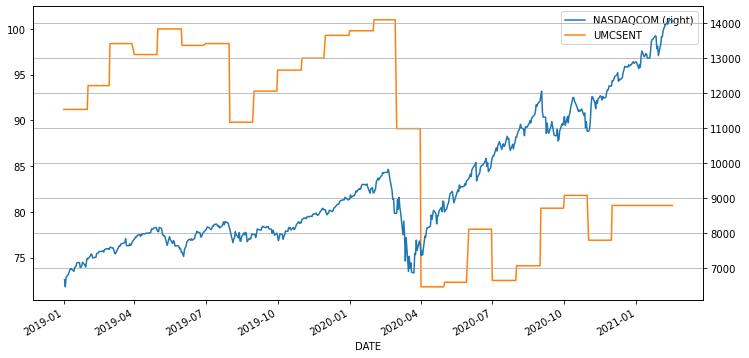

In [60]:
# 최근(2020년 10월), 나스닥지수(NASDAQCOM)와 미시건대 소비자심리지수(UMCSENT)
df = fdr.DataReader(['NASDAQCOM','UMCSENT'], start = '2019', data_source = 'fred')
ax = df.plot(secondary_y='NASDAQCOM')

In [61]:
df.tail()

,NASDAQCOM,UMCSENT
DATE,,
2021-02-10,13972.53,80.7
2021-02-11,14025.77,80.7
2021-02-12,14095.47,80.7
2021-02-15,14095.47,80.7
2021-02-16,14047.50,80.7


## 주택 판매 지수 (HSN1F)
https://fred.stlouisfed.org/series/HSN1F

주택 판매 지수는 주택시장 활성화 정도를 나타냅니다. 불황으로 주가가 하락할 때 하락에 앞서 주택 판매 지수가 하락하는 모습을 보입니다.

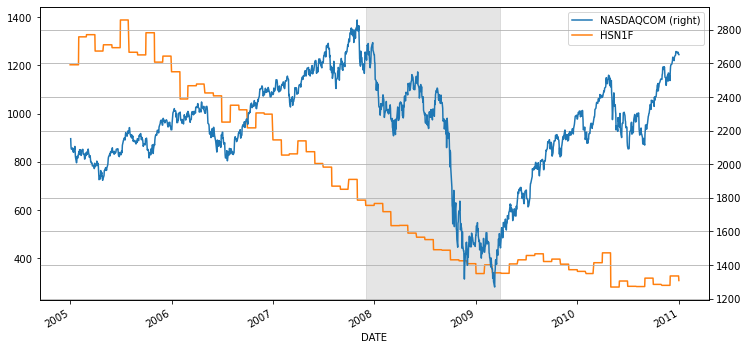

In [63]:
# 2008년 금융귀기 나스닥지수 (NASDAQCOM)와 주택 판매 지수 

df = fdr.DataReader(['NASDAQCOM','HSN1F'], start='2005', end = '2011', data_source = 'fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01','2009-03-30', color = 'gray', alpha =0.2)

최근 주택 판매지수는 팬데믹 이후 반등하는 모습을 보이고 있습니다.

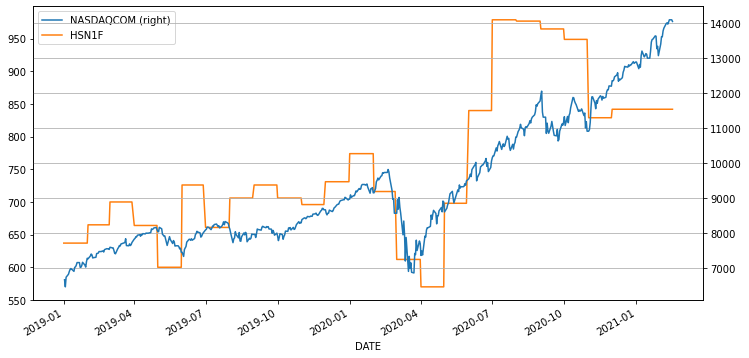

In [64]:
# 최근(2020년 10월), 나스닥지수(NASDAQCOM)와 주택판매지수(HSN1F)
df = fdr.DataReader(['NASDAQCOM','HSN1F'], start='2019', data_source='fred')
ax = df.plot(secondary_y = 'NASDAQCOM')

## 실업률(UNRATE)
https://fred.stlouisfed.org/series/UNRATE

실업률은 불황에는 후행지표, 경기회복에 동행지표로 작동합니다.

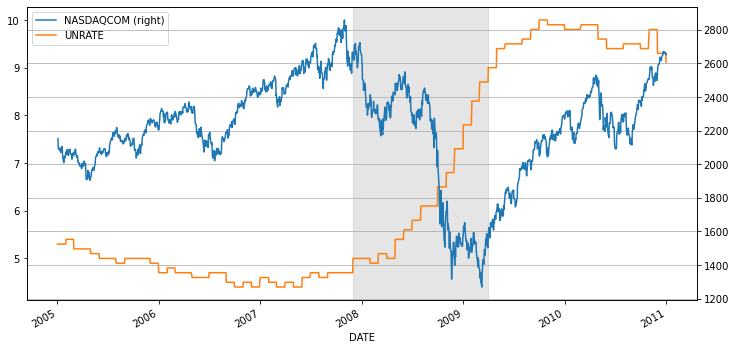

In [67]:
# 2008년 금융위기 나스닥지수(NASDAQCOM)와 실업률(UNRATE)

df=fdr.DataReader(['NASDAQCOM','UNRATE'], start = '2005', end = '2011', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax= ax.axvspan('2007-12-01','2009-03-30', color='gray', alpha=0.2)

실업률(UNRATE)은 팬데믹 이후 지속적으로 낮아지고 있습니다.

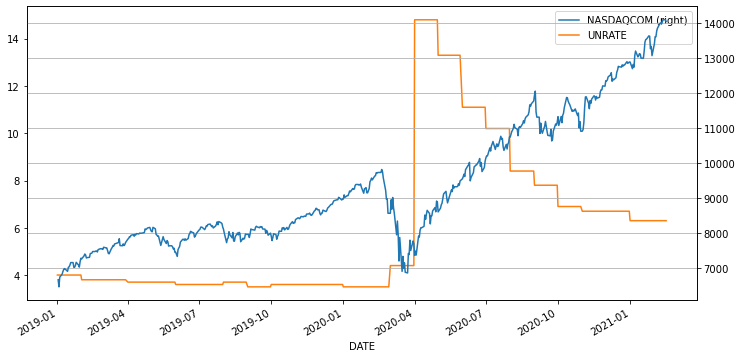

In [68]:
#최근(2020년 10월), 나스닥지수(NASDAQCOM)와 실업룰(UNRATE)

df = fdr.DataReader(['NASDAQCOM','UNRATE'], start = '2019', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')

## M2 통화량(M2)

https://fred.stlouisfed.org/series/M2

M2 통화량은 시중 돈이 얼마나 많이 풀렸는지(유동성)을 보여주는 지표입니다.

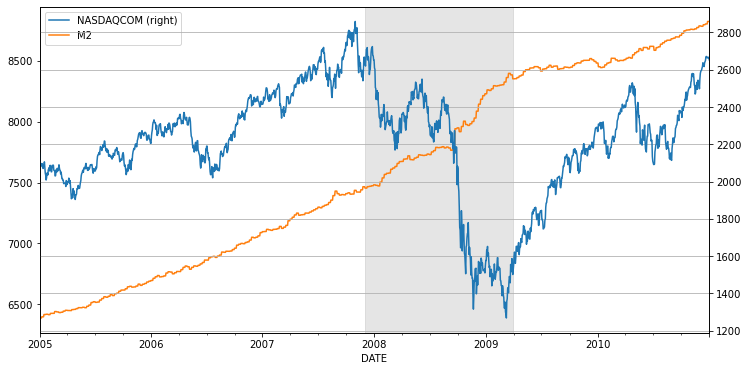

In [69]:
# 2008년 금융윅, 나스닥지수(NASDAQCOM)와 M2통화량(M2)

df=fdr.DataReader(['NASDAQCOM','M2'], start = '2005', end = '2011', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01','2009-03-30', color= 'gray', alpha=0.2)

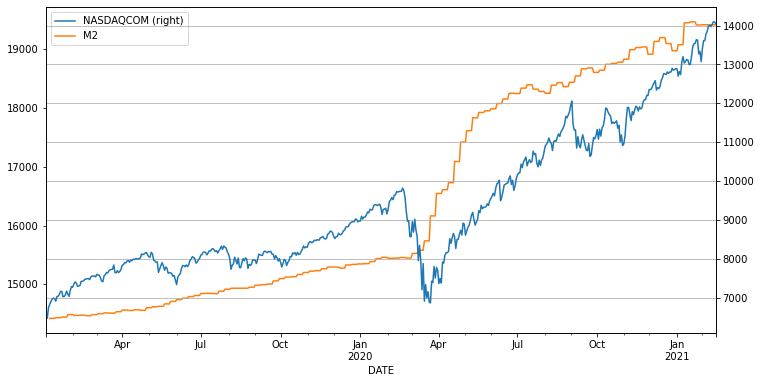

In [70]:
# 최근(2020년 10월), 나스닥지수(NASDAQCOM)와 M2통화량(M2)

df = fdr.DataReader(['NASDAQCOM','M2'], start='2019', data_source='fred')
ax = df.plot(secondary_y = 'NASDAQCOM')


## 하이일드 채권 스프레드(BAMLH0A0HYM2)
https://fred.stlouisfed.org/series/BAMLH0A0HYM2

하이일드 채권은 낮은 신용등급 회사에 투자하는 고위험,고수익 채권입니다. 여기서 스프레드는 국채 수익률과의 차이를 이야기합니다.

하이일드 채권 스프레드 = 하이일드 채권 수익률 – 국채 수익률

불황일 수록 하이일드 채권 스프레드는 더 커집니다.

FRED에서 'ICE BofA US High Yield Index Option-Adjusted Spread'라는 하이일드 채권 스프레드 데이터를 제공합니다.

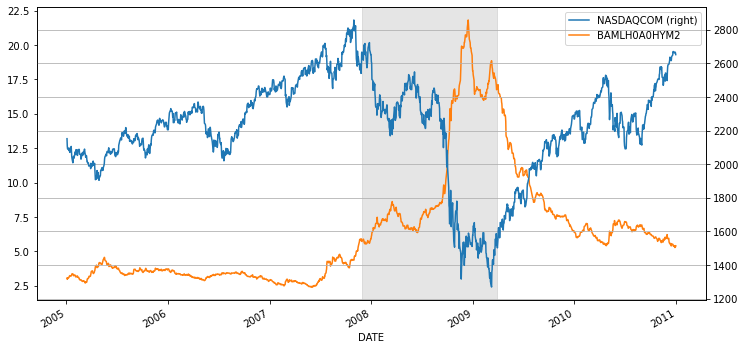

In [71]:
# 2008년 금융위기, 나스닥지수(NASDAQCOM)와 하이일드 채권 스프레드 

df = fdr.DataReader(['NASDAQCOM','BAMLH0A0HYM2'], start = '2005', end ='2011', data_source='fred')
ax = df.plot(secondary_y = 'NASDAQCOM')
ax = ax.axvspan('2007-12-01','2009-03-30', color='gray', alpha=0.2)

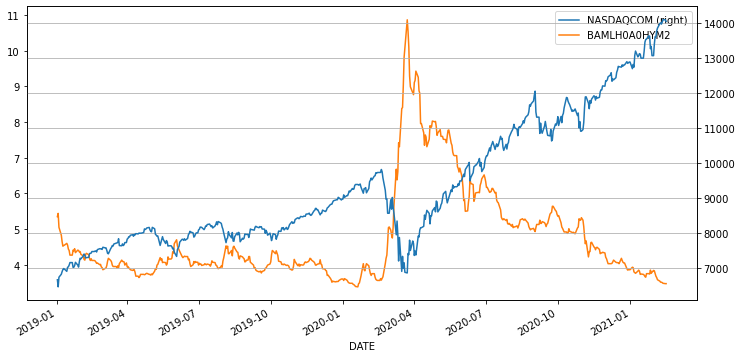

In [72]:
# 최근(2020년 10월), 나스닥지수(NASDAQCOM)와 하이일드 채권 스프래드

df = fdr.DataReader(['NASDAQCOM','BAMLH0A0HYM2'], start = '2019', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')

# 결론
1. 주간 실업수당 청구 건수 (ICSA): 긍정적(지속↓)
2. 소비자심리지수 (UMCSENT): 부정적(하락)
3. 주택 판매 지수 (HSN1F): 긍정적(지속↑)
4. 실업률 (UNRATE): 긍정적(지속↓)
5. M2 통화량(M2): 긍정적(지속↑)
6. 하이일드 채권 스프레드 (BAMLH0A0HYM2): 긍정적(지속↓)